In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
from anndata import AnnData, read_h5ad
from scipy.stats import pearsonr, norm, ttest_ind, fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import nrrd
import matplotlib.pyplot as plt
from scipy import stats

import plotting_help_py37 as ph
import orn_pn_matching as opm

In [2]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
ORN = read_h5ad('../ORN_seq-main/data/ORN_all_annotated_GH.h5ad')
ORN_42h = ORN[(ORN.obs.stage == '42h')]
ORN_24h = ORN[(ORN.obs.stage == '24h')]
ORN_adult = ORN[(ORN.obs.stage == 'adult')]
PN = read_h5ad('../FlyPN_development-main/data/adata_PN_all_annotated_2022update.h5ad')
PN_0h = PN[(PN.obs.stage == '0h')]
PN_24h = PN[(PN.obs.stage == '24h')]
PN_48h = PN[(PN.obs.stage == '48h')]
PN_adult = PN[(PN.obs.stage == 'adult')]
mm, _ = nrrd.read('data_/OlfactoryGlomeruli_JFRC_python.nrrd')

seqss1 = ORN_42h
seqss2 = PN_24h
gloms1 = list(np.unique(opm.get_glomtypes_from_seqss(seqss1, datatype_orn=True)))
gloms2 = list(np.unique(opm.get_glomtypes_from_seqss(seqss2, datatype_orn=False)))
gloms_shared = list(set(gloms1).intersection(gloms2))
genes1 = list(seqss1.var_names)
genes2 = list(seqss2.var_names)
genes_shared = list(set(genes1).intersection(genes2))
csms_shared = opm.get_CSMs(genes_shared, infunc_print=False)

In [60]:
opm.get_genename_from_seqss(ORN, 'cue')

['cue']

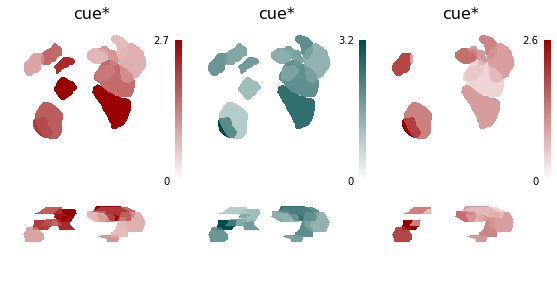

In [61]:
gene = 'cue'
genes = [gene,gene,gene]
opm.plot_expr_afo_gloms_onmap_ORNPN([ORN_42h,PN_24h,ORN_24h,], mm, genes=genes, 
        glom_list=gloms_shared, datatypes_orn=[True,False,True,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)

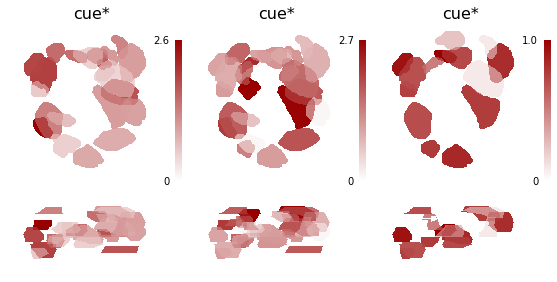

In [62]:
# gene = 'ed'
genes = [gene,gene,gene]
seqsss = [ORN_24h,ORN_42h,ORN_adult,]
opm.plot_expr_afo_gloms_onmap_ORNPN(seqsss, mm, genes=genes,
        glom_list=[], datatypes_orn=[True,True,True])

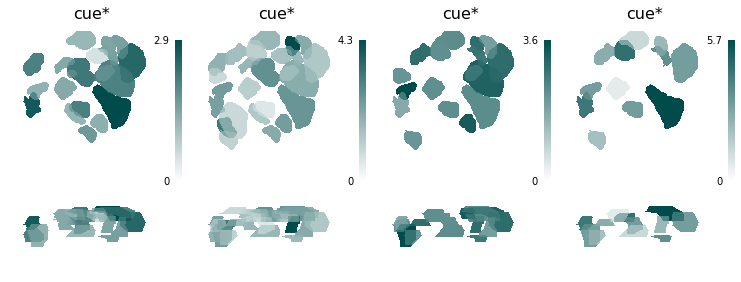

In [63]:
# gene = 'Piezo'
genes = [gene,gene,gene,gene]
opm.plot_expr_afo_gloms_onmap_ORNPN([PN_0h,PN_24h,PN_48h,PN_adult], mm, genes=genes, 
        glom_list=[], datatypes_orn=[False,False,False,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)

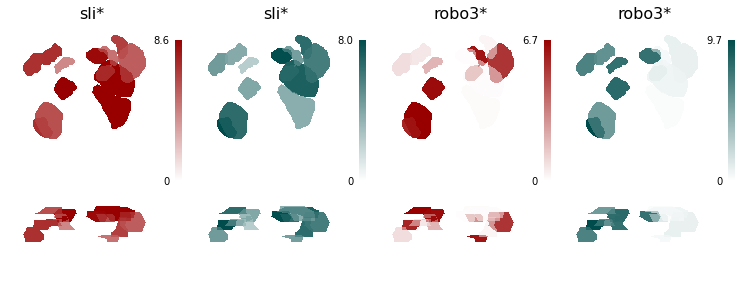

In [9]:
genes = ['sli','sli','robo3','robo3',]
opm.plot_expr_afo_gloms_onmap_ORNPN([ORN_42h,PN_24h,ORN_42h, PN_24h,ORN_42h, PN_24h], mm, genes=genes, 
        glom_list=gloms_shared, datatypes_orn=[True,False,True,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)

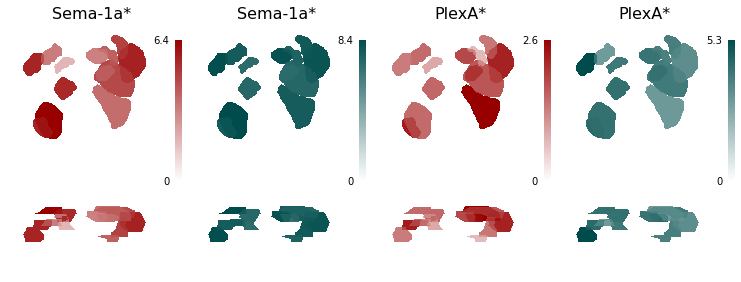

In [8]:
genes = ['Sema-1a','Sema-1a','PlexA','PlexA',]
opm.plot_expr_afo_gloms_onmap_ORNPN([ORN_42h,PN_24h,ORN_42h, PN_24h,ORN_42h, PN_24h], mm, genes=genes, 
        glom_list=gloms_shared, datatypes_orn=[True,False,True,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)

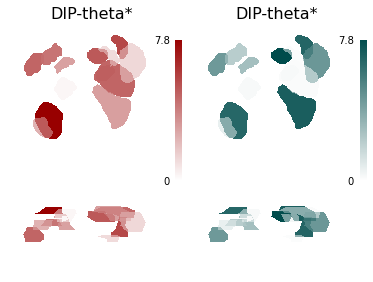

In [66]:
genes = ['DIP-alpha','DIP-theta',]
opm.plot_expr_afo_gloms_onmap_ORNPN([ORN_42h,PN_24h,ORN_42h, PN_24h,ORN_42h, PN_24h], mm, genes=genes, 
        glom_list=gloms_shared, datatypes_orn=[True,False,True,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)

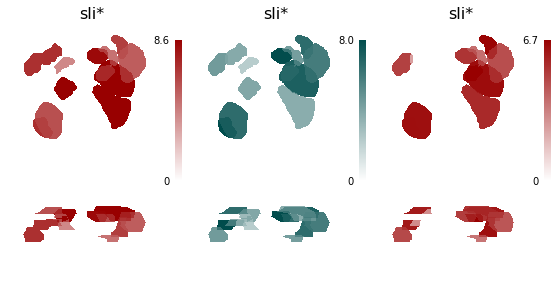

In [72]:
gene = 'sli'
genes = [gene,gene,gene]
opm.plot_expr_afo_gloms_onmap_ORNPN([ORN_42h,PN_24h,ORN_24h,], mm, genes=genes, 
        glom_list=gloms_shared, datatypes_orn=[True,False,True,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)

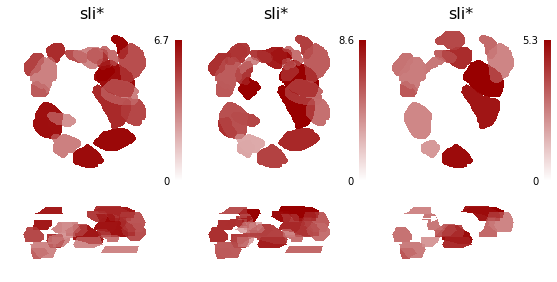

In [73]:
# gene = 'ed'
genes = [gene,gene,gene]
seqsss = [ORN_24h,ORN_42h,ORN_adult,]
opm.plot_expr_afo_gloms_onmap_ORNPN(seqsss, mm, genes=genes,
        glom_list=[], datatypes_orn=[True,True,True])

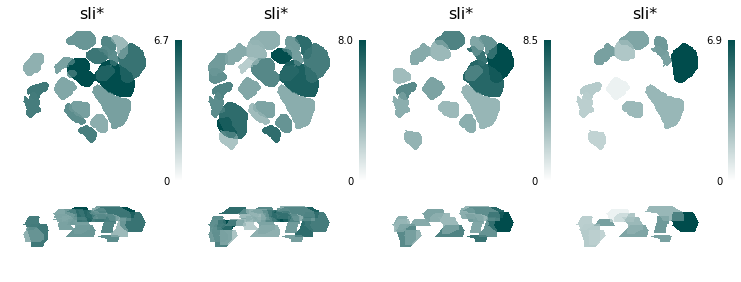

In [74]:
# gene = 'Piezo'
genes = [gene,gene,gene,gene]
opm.plot_expr_afo_gloms_onmap_ORNPN([PN_0h,PN_24h,PN_48h,PN_adult], mm, genes=genes, 
        glom_list=[], datatypes_orn=[False,False,False,False,True,False])
# ph.save('%s-PN ORN-for ORN Toll-7' % genename, exts=['png'], dpi=100)